## Clustering wine

In [3]:
from sklearn import datasets
import pandas as pd

In [4]:
wine = datasets.load_wine()
df =pd.DataFrame(wine.data, columns=wine.feature_names)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


### Mean of index

Explanatory variable（説明変数）

1. alcohol アルコール濃度
2. malic_acid リンゴ酸
3. ash 灰（？
4. alcalinity_of_ash 灰のアルカリ成分（？
5. magnesium マグネシウム
6. total_phenols 総フェノール類量
7. flavanoids フラボノイド（ポリフェノールらしい）
8. nonflavanoid_phenols 非フラボノイドフェノール類
9. proanthocyanins プロアントシアニジン（ポリフェノールの一種らしい）
10. color_intensity 色の強さ
11. hue 色合い
12. od280/od315_of_diluted_wines ワインの希釈度合い
13. proline プロリン（アミノ酸の一種らしい）

Object variable（目的変数）

14. ワインの品種

In [10]:
# Class of wine.
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

array([[<Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'malic_acid'}>,
        <Axes: title={'center': 'ash'}>,
        <Axes: title={'center': 'alcalinity_of_ash'}>],
       [<Axes: title={'center': 'magnesium'}>,
        <Axes: title={'center': 'total_phenols'}>,
        <Axes: title={'center': 'flavanoids'}>,
        <Axes: title={'center': 'nonflavanoid_phenols'}>],
       [<Axes: title={'center': 'proanthocyanins'}>,
        <Axes: title={'center': 'color_intensity'}>,
        <Axes: title={'center': 'hue'}>,
        <Axes: title={'center': 'od280/od315_of_diluted_wines'}>],
       [<Axes: title={'center': 'proline'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

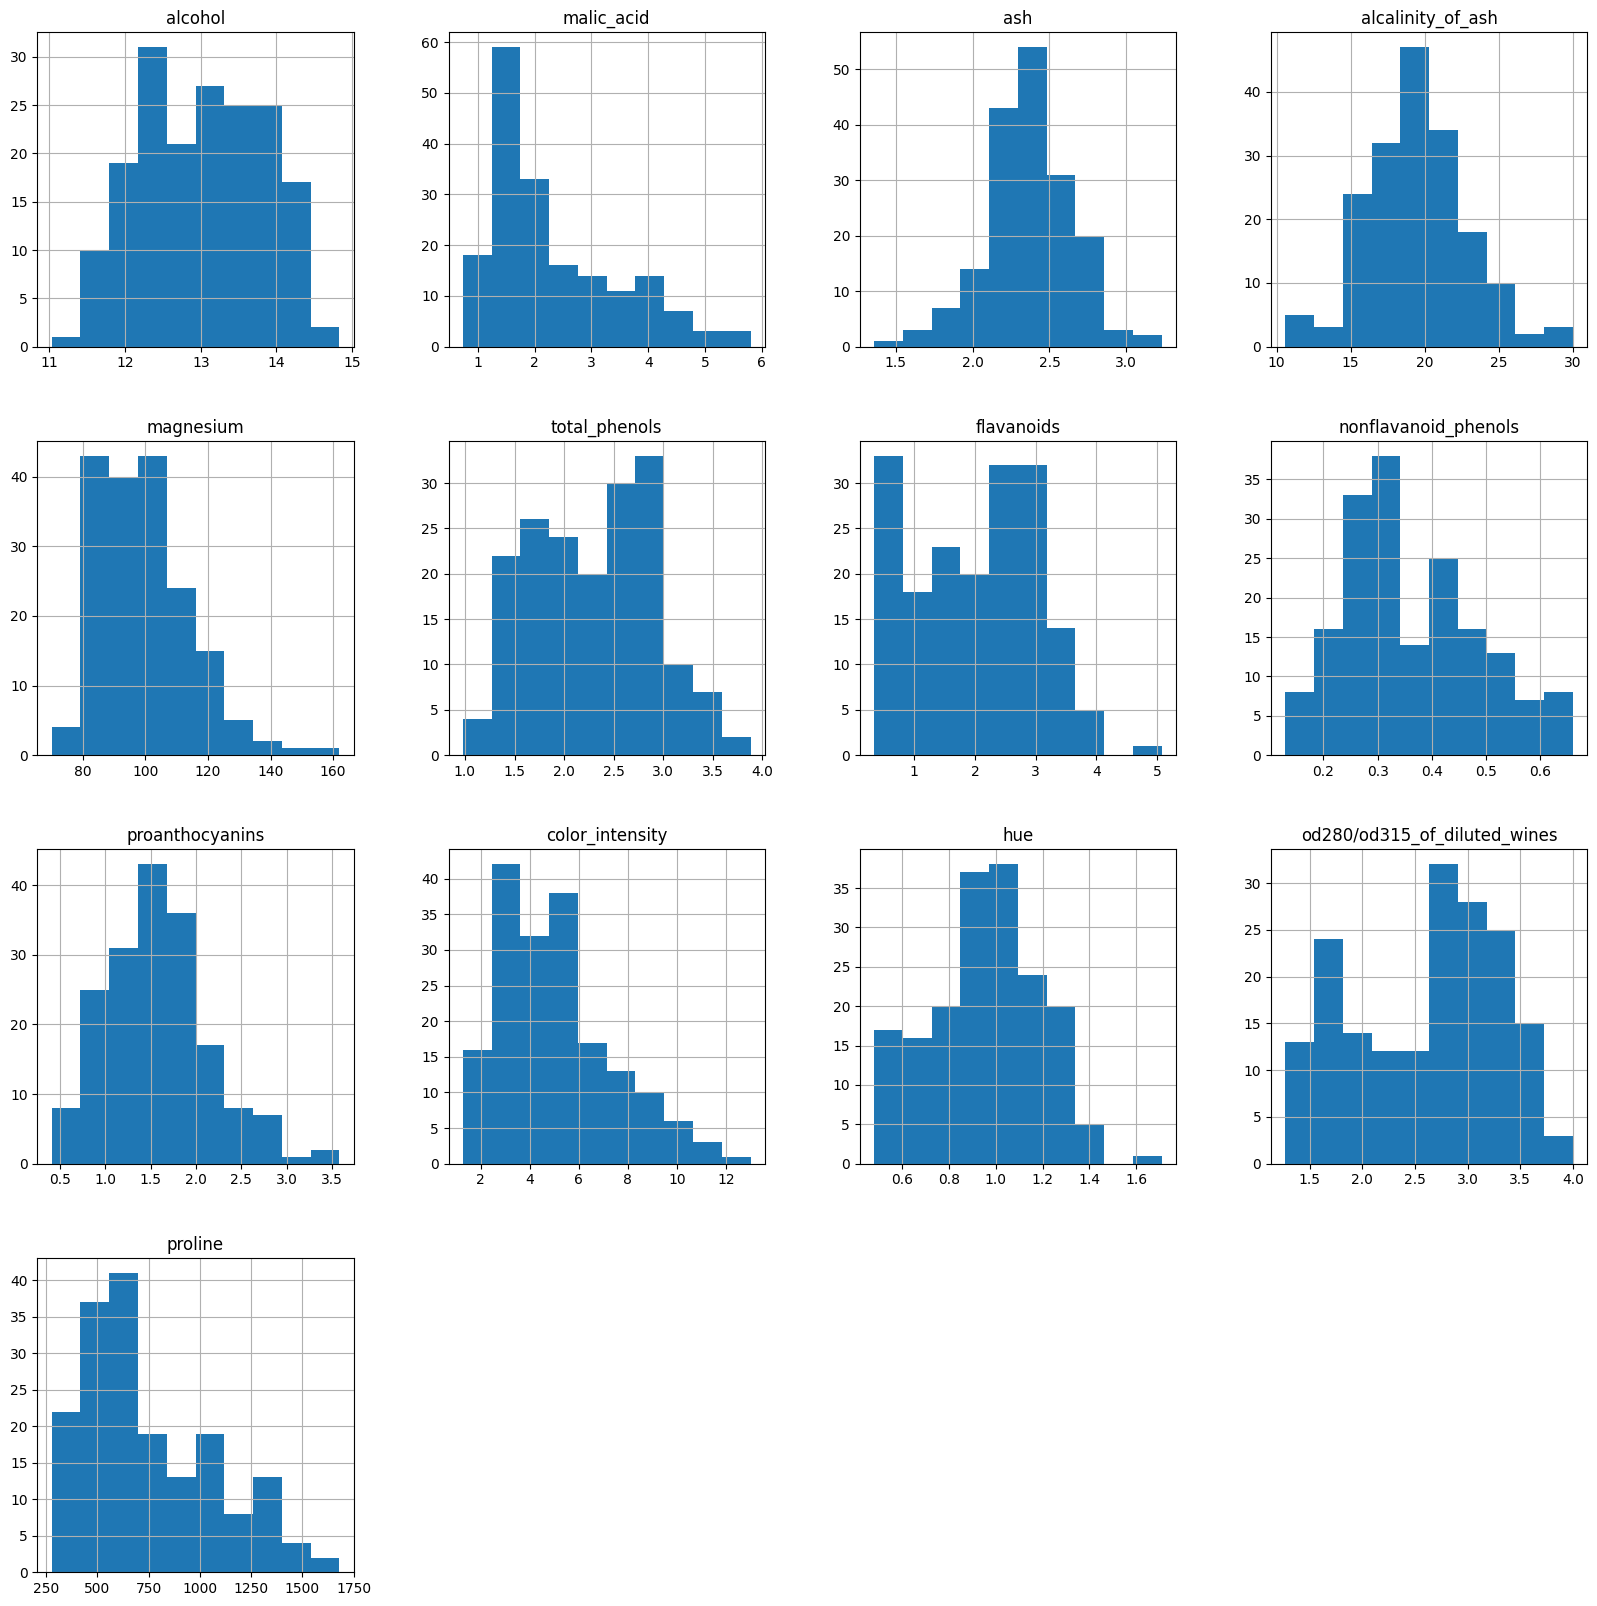

In [13]:
# Show histgrams.
df.dropna(axis=1).hist(figsize=(20,20))

### 6 columns clustering

In [59]:
# Decide the kinds of columns.

columns = ['total_phenols', 'flavanoids', 'od280/od315_of_diluted_wines', 'color_intensity', 'proline']
df = df[columns]
df

,total_phenols,flavanoids,od280/od315_of_diluted_wines,color_intensity,proline
0,2.80,3.06,3.92,5.64,1065.0
1,2.65,2.76,3.40,4.38,1050.0
2,2.80,3.24,3.17,5.68,1185.0
3,3.85,3.49,3.45,7.80,1480.0
4,2.80,2.69,2.93,4.32,735.0
...,...,...,...,...,...
173,1.68,0.61,1.74,7.70,740.0
174,1.80,0.75,1.56,7.30,750.0
175,1.59,0.69,1.56,10.20,835.0
176,1.65,0.68,1.62,9.30,840.0


In [18]:
# Confirm the number of lacking data.

df.isnull().sum()

total_phenols                   0
flavanoids                      0
od280/od315_of_diluted_wines    0
color_intensity                 0
proline                         0
dtype: int64

In [19]:
# Standardazation

from sklearn.preprocessing import StandardScaler
std_sc = StandardScaler()
std_data = std_sc.fit_transform(df)
std_data_df =pd.DataFrame(std_data, columns=df.columns)
std_data_df

,total_phenols,flavanoids,od280/od315_of_diluted_wines,color_intensity,proline
0,0.808997,1.034819,1.847920,0.251717,1.013009
1,0.568648,0.733629,1.113449,-0.293321,0.965242
2,0.808997,1.215533,0.788587,0.269020,1.395148
3,2.491446,1.466525,1.184071,1.186068,2.334574
4,0.808997,0.663351,0.449601,-0.319276,-0.037874
...,...,...,...,...,...
173,-0.985614,-1.424900,-1.231206,1.142811,-0.021952
174,-0.793334,-1.284344,-1.485445,0.969783,0.009893
175,-1.129824,-1.344582,-1.485445,2.224236,0.280575
176,-1.033684,-1.354622,-1.400699,1.834923,0.296498


In [22]:
# Execute clustering algorithms.

from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=3, random_state=1)
cluster.fit(std_data_df)

# Show labels by clustering
cluster_labels = cluster.labels_
cluster_labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 0,
       2, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [26]:
# Append index to dataframe.

df['cluster'] = cluster_labels

# Show the mean of data grouped by clustering.

df.groupby('cluster').mean().style.bar(axis=0)

,total_phenols,flavanoids,od280/od315_of_diluted_wines,color_intensity,proline
cluster,,,,,
0,2.222656,2.041094,2.826875,2.949688,505.031250
1,1.680769,0.819615,1.690385,7.151731,629.807692
2,2.885161,3.031613,3.162258,5.478548,1094.758065


In [96]:
from sklearn.metrics import confusion_matrix # Confusion matrix

df['class']=wine.target
df['cluster']=cluster_labels

pd.DataFrame(confusion_matrix(df['cluster'], df['class']), index=['predicted 0', 'predicted 1', 'predicted 2'], columns=['real 0', 'real 1', 'real 2'])

,real 0,real 1,real 2
predicted 0,2,62,0
predicted 1,0,4,48
predicted 2,57,5,0


/var/folders/g2/nrr8zz292js1t18sthg2v_yw0000gn/T/ipykernel_50307/1966887165.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(ax=axes[0,0], data=df, x='cluster', y='total_phenols', palette=color_codes, alpha=0.5)
/var/folders/g2/nrr8zz292js1t18sthg2v_yw0000gn/T/ipykernel_50307/1966887165.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(ax=axes[0,1], data=df, x='cluster', y='flavanoids', palette=color_codes, alpha=0.5)
/var/folders/g2/nrr8zz292js1t18sthg2v_yw0000gn/T/ipykernel_50307/1966887165.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.ba

<Axes: xlabel='cluster', ylabel='proline'>

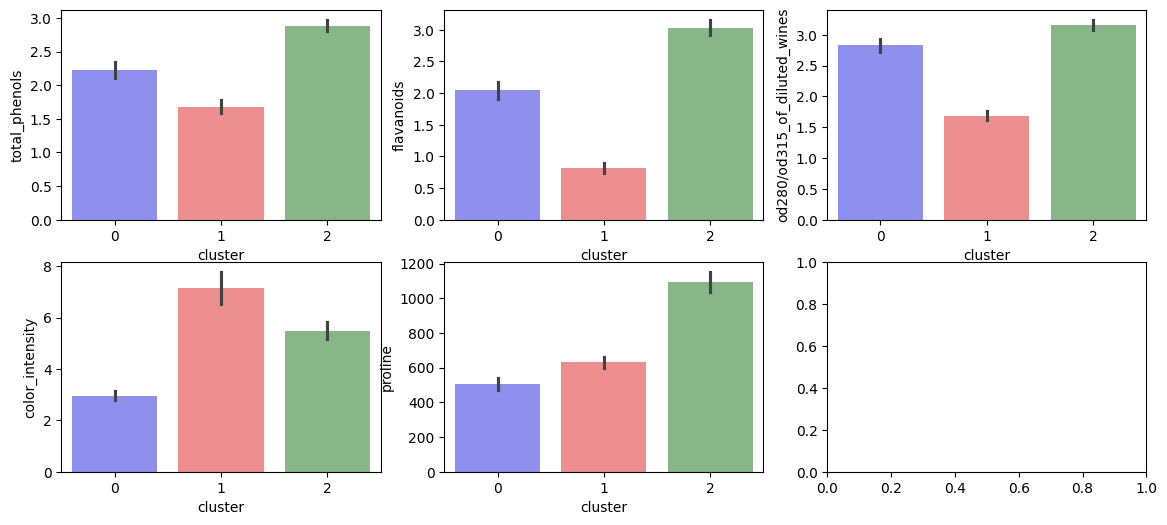

In [44]:
import matplotlib.pyplot as plt
import seaborn as sb

color_codes = {'0':'blue', '1':'red', '2':'green'}
# colors = [color_codes[x] for x in df['cluster'].tolist()]

fig, axes = plt.subplots(2,3, figsize=(14,6))
sb.barplot(ax=axes[0,0], data=df, x='cluster', y='total_phenols', palette=color_codes, alpha=0.5)
sb.barplot(ax=axes[0,1], data=df, x='cluster', y='flavanoids', palette=color_codes, alpha=0.5)
sb.barplot(ax=axes[0,2], data=df, x='cluster', y='od280/od315_of_diluted_wines', palette=color_codes, alpha=0.5)
sb.barplot(ax=axes[1,0], data=df, x='cluster', y='color_intensity', palette=color_codes, alpha=0.5)
sb.barplot(ax=axes[1,1], data=df, x='cluster', y='proline', palette=color_codes, alpha=0.5)

In [56]:
# Add the cluster number to the dataframe.

std_data_df['cluster'] = cluster_labels

# Execute PCA.

from sklearn.decomposition import PCA

pca = PCA(random_state=1)
feature = pca.fit_transform(std_data_df)
feature

array([[ 2.49994896,  0.17946129, -0.21766672, -0.94472652,  0.13611505,
        -0.10915558],
       [ 1.88131422,  0.10046653, -0.62956322, -0.31284811,  0.30405308,
        -0.07455808],
       [ 2.26278273,  0.70833679, -0.32062545, -0.05401911, -0.02446654,
         0.25890436],
       ...,
       [-1.9353977 ,  2.46218728,  0.35317735, -0.36589453, -0.50021746,
        -0.00804198],
       [-1.83209241,  2.16304439,  0.15930452, -0.23495425, -0.43945399,
        -0.10684024],
       [-1.82741219,  1.7168231 ,  0.97543461, -0.00949551,  0.03388006,
        -0.38049818]])

Text(0.5, 1.0, 'Principal Component Analysis (PCA)')

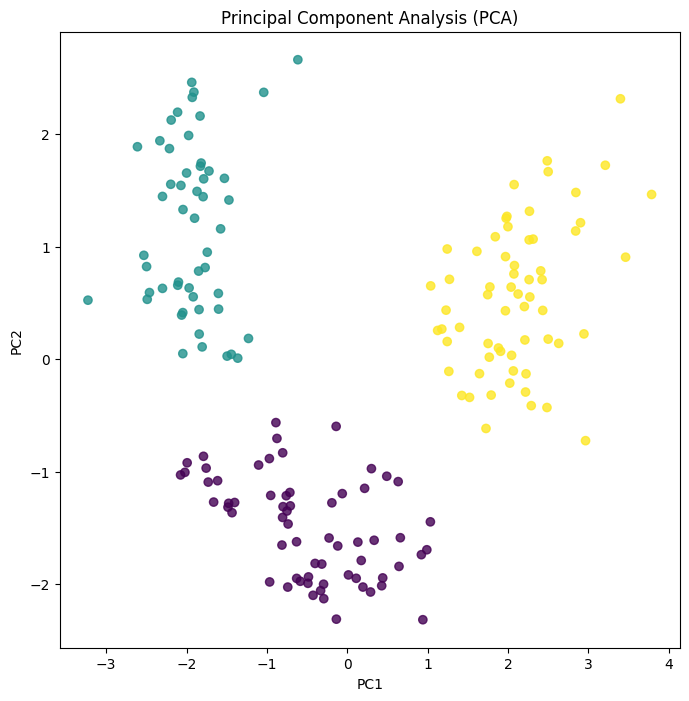

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.scatter(feature[:,0], feature[:,1], alpha=0.8, c=cluster_labels)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal Component Analysis (PCA)')

In [65]:
# Contribution rate

ev = pd.DataFrame(pca.explained_variance_ratio_, index=['PC{}'.format(x+1) for x in range(len(std_data_df.columns))], columns=['Contribution rate']).T
ev

,PC1,PC2,PC3,PC4,PC5,PC6
Contribution rate,0.544151,0.296778,0.075397,0.035438,0.02748,0.020756


In [67]:
# Cumulated contribution rate

t_ev = pd.DataFrame(pca.explained_variance_ratio_.cumsum(), index=['PC{}'.format(x+1) for x in range(len(std_data_df.columns))], columns=['Cumulated contribution rate']).T
t_ev

,PC1,PC2,PC3,PC4,PC5,PC6
Cumulated contribution rate,0.544151,0.840929,0.916326,0.951764,0.979244,1.0


### All columns clustering

In [68]:
wine = datasets.load_wine()
df =pd.DataFrame(wine.data, columns=wine.feature_names)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [69]:
# Standardization

from sklearn.preprocessing import StandardScaler
std_sc = StandardScaler()
std_data_all = std_sc.fit_transform(df)
std_data_df_all = pd.DataFrame(std_data_all, columns=df.columns)
std_data_df_all

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [74]:
# Execute clustering algorithms.

from sklearn.cluster import KMeans
cluster_all = KMeans(n_clusters=3, random_state=1)
cluster_all.fit(std_data_df_all)
# cluster_all.predict(std_data_all)

# Show labels by clustering
cluster_labels_all = cluster_all.labels_
cluster_labels_all

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [77]:
# Append columns to dataframe.

std_data_df_all['cluster'] = cluster_labels_all

# Show the mean of data grouped by clustering.
std_data_df_all.groupby('cluster').mean().style.bar(axis=0)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
cluster,,,,,,,,,,,,,
0,-0.939003,-0.391966,-0.439201,0.208988,-0.463774,-0.053348,0.066904,-0.019822,0.064792,-0.882075,0.452982,0.289738,-0.756026
1,0.164907,0.871547,0.186898,0.524367,-0.075473,-0.979330,-1.215248,0.726064,-0.779706,0.941539,-1.164789,-1.292412,-0.407088
2,0.878097,-0.304576,0.318942,-0.664524,0.564888,0.876505,0.943639,-0.585590,0.581783,0.167188,0.483728,0.767053,1.158347


In [78]:
# Execute PCA.

from sklearn.decomposition import PCA

pca = PCA(random_state=1)
feature_all = pca.fit_transform(std_data_df_all)
feature_all

array([[ 3.56814161, -1.18818798, -0.08574575, ...,  0.56278452,
         0.20142929,  0.06710886],
       [ 2.36166365,  0.18660873, -2.08962482, ...,  0.37872483,
        -0.18446349, -0.13640088],
       [ 2.74096036, -0.88344336,  1.02463496, ..., -0.00470422,
        -0.14598445, -0.0865219 ],
       ...,
       [-2.3737399 , -2.96821613, -0.78569137, ...,  0.72646226,
         0.2625509 ,  0.29077156],
       [-2.13102309, -2.48884189, -0.42828208, ...,  0.36811532,
         0.2704319 ,  0.17533721],
       [-2.90047462, -3.01394226,  1.13750331, ..., -0.18074747,
         0.35429759, -0.13645149]])

Text(0.5, 1.0, 'Principal Component Analysis (PCA)')

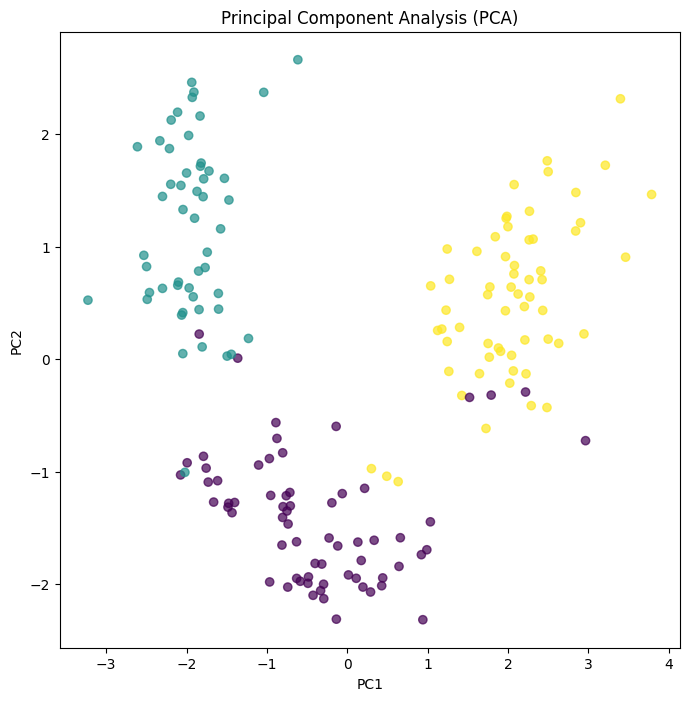

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.scatter(feature[:,0], feature[:,1], alpha=0.7,c=cluster_labels_all)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal Component Analysis (PCA)')

In [81]:
# Contribution rate

ev = pd.DataFrame(pca.explained_variance_ratio_, index=['PC{}'.format(x+1) for x in range(len(std_data_df_all.columns))], columns=['Contribution rate']).T
ev

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Contribution rate,0.355345,0.209716,0.106117,0.067546,0.06267,0.048656,0.040252,0.02542,0.021479,0.018762,0.016505,0.01233,0.00783,0.007374


In [82]:
# Cumulated contribution rate

t_ev = pd.DataFrame(pca.explained_variance_ratio_.cumsum(), index=['PC{}'.format(x+1) for x in range(len(std_data_df_all.columns))], columns=['Cumulated contribution rate']).T
t_ev

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Cumulated contribution rate,0.355345,0.56506,0.671177,0.738724,0.801394,0.850049,0.890301,0.915721,0.9372,0.955961,0.972467,0.984796,0.992626,1.0


### Conclusion

According to the clustering algorithms, the result of chosen 6 columns' dataset can be well divided 3 clusters.